In [91]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [92]:
%config InlineBackend.figure_format = 'retina'

In [122]:
from pathlib import Path
from kspecdr.tlm.make_tlm import make_tlm

WD = Path.cwd()
datadir = Path("/data1/hbahk/kspec/kspecdr/resources/")
# fpath = datadir / "08feb10087im.fits"
fpath = datadir / "08feb10093.fits"
args = {"IMAGE_FILENAME": fpath.as_posix()}

In [123]:
from kspecdr.io.image import ImageFile

im = ImageFile(fpath.as_posix(), mode='READ')
im.open()
print(im.get_header_value('RO_NOISE', 7.0))
print(im.get_header_value('RO_GAIN'))

INFO:kspecdr.io.image:Opened file: /data1/hbahk/kspec/kspecdr/resources/08feb10093.fits (mode: READ)
6.87
1.87


In [124]:
from kspecdr.preproc.make_im import make_im

make_im(fpath.as_posix(),
        cosmic_ray_method='NONE',
        verbose=False)


INFO:kspecdr.preproc.make_im:Creating IM file from raw data with TDFIO_CREATEBYCOPY functionality...
INFO:kspecdr.preproc.make_im:Creating IM file from raw file: /data1/hbahk/kspec/kspecdr/resources/08feb10093.fits -> /data1/hbahk/kspec/kspecdr/resources/08feb10093_im.fits
INFO:kspecdr.io.image:Opened file: /data1/hbahk/kspec/kspecdr/resources/08feb10093.fits (mode: READ)
INFO:kspecdr.preproc.make_im:Instrument: TAIPAN, SPECTID: RD, CLASS: , BITPIX: 16
INFO:kspecdr.io.image:Closed file: /data1/hbahk/kspec/kspecdr/resources/08feb10093.fits
INFO:kspecdr.io.image:Opened file: /data1/hbahk/kspec/kspecdr/resources/08feb10093.fits (mode: READ)
INFO:kspecdr.preproc.make_im:Creating variance HDU for raw file
INFO:kspecdr.preproc.make_im:Copying fiber table from source file
INFO:kspecdr.io.image:Opened file: /data1/hbahk/kspec/kspecdr/resources/08feb10093_im.fits (mode: UPDATE)
INFO:kspecdr.io.image:Copied fiber table 'FIBRES' from source file
INFO:kspecdr.preproc.make_im:Processing TAIPAN fibe

'/data1/hbahk/kspec/kspecdr/resources/08feb10093_im.fits'

In [96]:
fpath = datadir / "08feb10093_im.fits"
args = {"IMAGE_FILENAME": fpath.as_posix()}

from kspecdr.tlm.make_tlm import read_instrument_data

im = ImageFile(fpath.as_posix(), mode='READ')
im.open()
img_data, var_data, fibre_types = read_instrument_data(im, 6)

INFO:kspecdr.io.image:Opened file: /data1/hbahk/kspec/kspecdr/resources/08feb10093_im.fits (mode: READ)


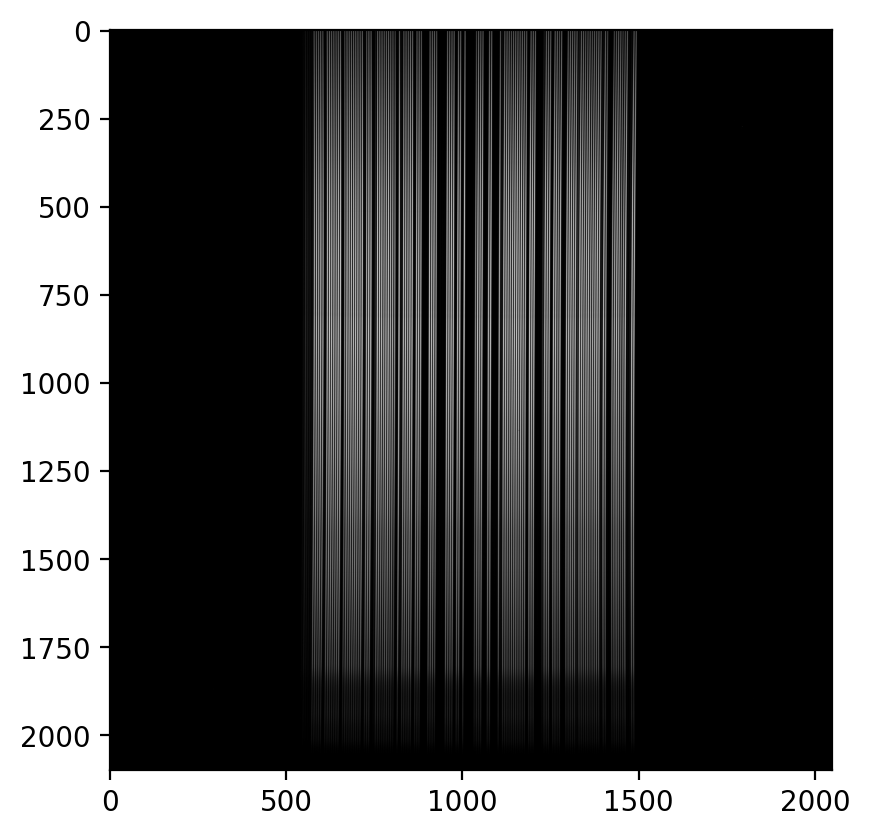

In [125]:
from matplotlib import pyplot as plt

plt.imshow(img_data, cmap='gray')
plt.show()

In [99]:
from kspecdr.tlm.make_tlm import set_instrument_specific_params

set_instrument_specific_params(6, {})

(2, 2, True, False, False, False)

In [100]:
from kspecdr.tlm.make_tlm import convert_fibre_types_to_trace_status
import numpy as np

convert_fibre_types_to_trace_status(6, np.array(['P', 'P', 'P', 'P', 'P', 'S', 'P', 'P', 'P', 'P']), 10)

array(['YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES'], dtype='<U5')

In [103]:
from kspecdr.tlm.make_tlm import read_instrument_data, set_instrument_specific_params, convert_fibre_types_to_trace_status, detect_traces
im_file, instrument_code = im, 6

# Step 0: Pre-amble - Read image data and get instrument information
img_data, var_data, fibre_types = read_instrument_data(
    im_file, instrument_code
)

# Step 1: Set instrument-specific parameters
order, pk_search_method, do_distortion, sparse_fibs, experimental, qad_pksearch = (
    set_instrument_specific_params(instrument_code, args)
)

# Step 2: Convert fibre types to trace status
fibre_has_trace = convert_fibre_types_to_trace_status(
    instrument_code, fibre_types, len(fibre_types)
)

# Step 3: Count fibre types
n_officially_inuse = np.sum(fibre_has_trace == "YES")
n_potentially_able = np.sum(fibre_has_trace == "MAYBE")
n_officially_dead = np.sum(fibre_has_trace == "NO")

print(f"Fibres officially in use: {n_officially_inuse}")
print(f"Fibres potentially able: {n_potentially_able}")
print(f"Fibres officially dead: {n_officially_dead}")

# Step 4: Find fiber traces across the image
nx, ny = img_data.shape
max_ntraces = len(fibre_types)
nf = len(fibre_types)

ntraces, traces, spat_slice, pk_posn = detect_traces(
    img_data, nx, ny, max_ntraces, nf, order, sparse_fibs, 
    experimental, pk_search_method, do_distortion
)

Fibres officially in use: 91
Fibres potentially able: 59
Fibres officially dead: 0
INFO:kspecdr.tlm.make_tlm:Sweeping image for signs of fibre traces...
INFO:kspecdr.tlm.make_tlm:Processing column 0/2098 (0.0%)
INFO:kspecdr.tlm.make_tlm:Processing column 50/2098 (2.4%)
INFO:kspecdr.tlm.make_tlm:Processing column 100/2098 (4.8%)
INFO:kspecdr.tlm.make_tlm:Processing column 150/2098 (7.1%)
INFO:kspecdr.tlm.make_tlm:Processing column 200/2098 (9.5%)
INFO:kspecdr.tlm.make_tlm:Processing column 250/2098 (11.9%)
INFO:kspecdr.tlm.make_tlm:Processing column 300/2098 (14.3%)
INFO:kspecdr.tlm.make_tlm:Processing column 350/2098 (16.7%)
INFO:kspecdr.tlm.make_tlm:Processing column 400/2098 (19.1%)
INFO:kspecdr.tlm.make_tlm:Processing column 450/2098 (21.4%)
INFO:kspecdr.tlm.make_tlm:Processing column 500/2098 (23.8%)
INFO:kspecdr.tlm.make_tlm:Processing column 550/2098 (26.2%)
INFO:kspecdr.tlm.make_tlm:Processing column 600/2098 (28.6%)
INFO:kspecdr.tlm.make_tlm:Processing column 650/2098 (31.0%)
I

INFO:kspecdr.tlm.make_tlm:Found 116 traces across the image
INFO:kspecdr.tlm.make_tlm:Interpolating trace paths...
INFO:kspecdr.tlm.make_tlm:Final number of traces: 116


In [106]:
pk_posn

array([652., 621., 763., ...,   0.,   0.,   0.], shape=(2048,))

In [104]:
traces

array([[553.53110843, 559.86861975, 566.01993355, ...,   0.        ,
          0.        ,   0.        ],
       [553.53429731, 559.87161052, 566.02322321, ...,   0.        ,
          0.        ,   0.        ],
       [553.53747959, 559.87459479, 566.02650599, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [545.71970576, 551.88937525, 557.83957054, ...,   0.        ,
          0.        ,   0.        ],
       [545.70905308, 551.87876058, 557.8284646 , ...,   0.        ,
          0.        ,   0.        ],
       [545.6983938 , 551.86813941, 557.81735179, ...,   0.        ,
          0.        ,   0.        ]], shape=(2098, 150))

In [105]:
spat_slice

array([608.04761905, 607.52380952, 606.19047619, ..., 605.80952381,
       606.9047619 , 606.33333333], shape=(2048,))

In [117]:
%matplotlib inline

In [33]:
im.hdul[0].header["SPECTID"]

'RD'

(400.0, 700.0)

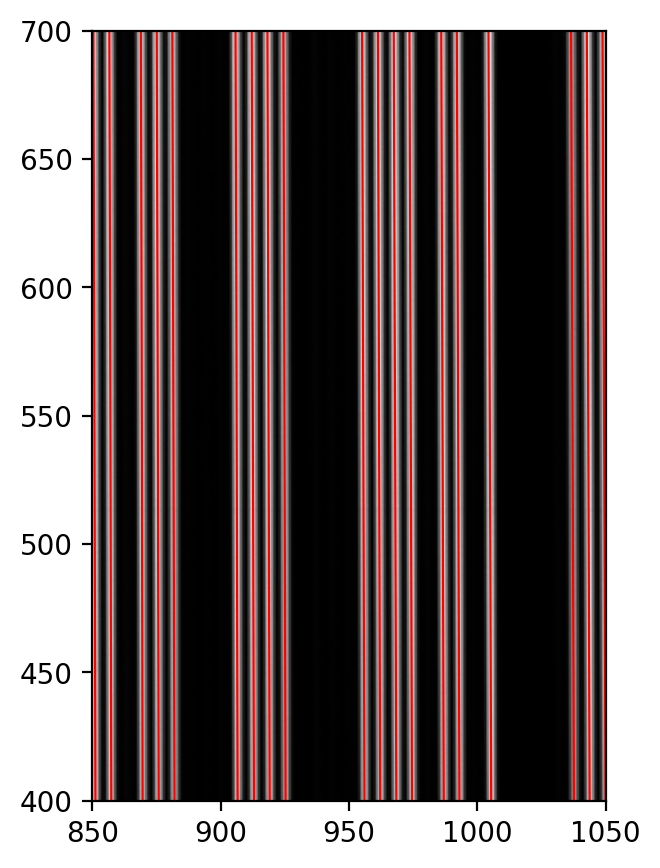

In [121]:
from astropy.visualization import ZScaleInterval
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(5, 5))
# ax.imshow(img_data, vmin=ZScaleInterval().get_limits(img_data)[0], vmax=ZScaleInterval().get_limits(img_data)[1])
ax.imshow(img_data, cmap='gray')
ln = ax.plot(traces, np.arange(1, nx + 1) - 0.5, c='r', lw=0.8)
ax.set_xlim(850, 1050)
ax.set_ylim(400, 700)

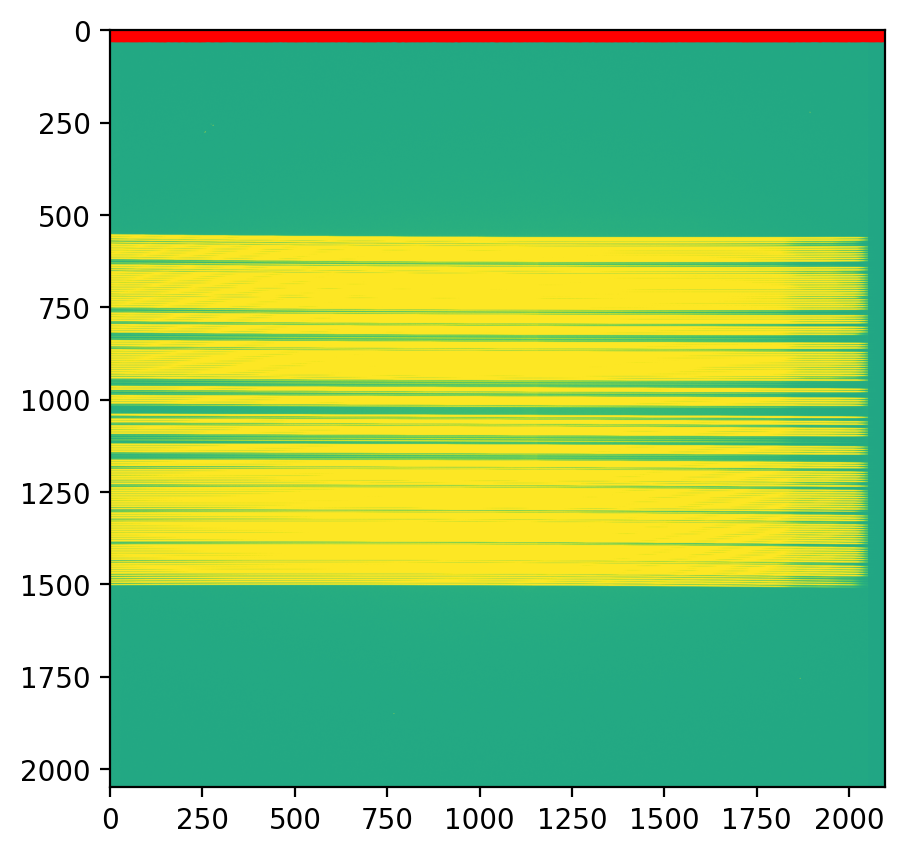

In [77]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(img_data, vmax=1000, vmin=10)
ax.plot(p_pks, [mid]*len(p_pks), 'ro')

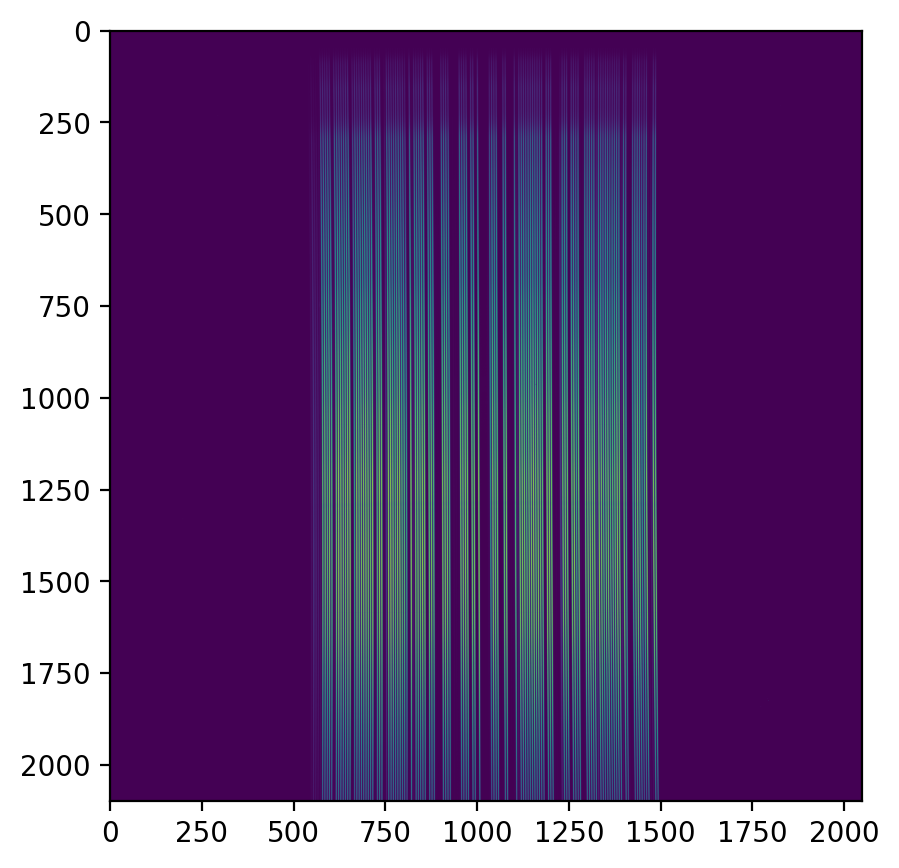

In [59]:
from astropy.io import fits

hdul = fits.open(args["IMAGE_FILENAME"])

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(hdul[0].data)
plt.show()

In [127]:
hdul[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 2048                                                  
NAXIS2  =                 2098                                                  
EXTEND  =                    T                                                  
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
LONGSTRN= 'OGIP 1.0'           / The HEASARC Long String Convention may be used.
COMMENT   This FITS file may contain long string keyword values that are        
COMMENT   continued over multiple keywords.  The HEASARC convention uses the &  
COMMENT   character at the end of each substring which is then continued        
COMMENT   on the next keywor